# Is there a correlation between a budget of a movie and its profit?

### Imports libraries, defines plotting style and where to save figures plotted.

In [150]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Taking a look at data types and seeing if there are null values.

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


### Replaces null values.

In [152]:
df['rating'] = df['rating'].fillna('Unknown')
df['released'] = df['released'].fillna('Unknown')
df['score'] = df['score'].fillna('0')
df['votes'] = df['votes'].fillna('0')
df['writer'] = df['writer'].fillna('Unknown')
df['star'] = df['star'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['budget'] = df['budget'].fillna('0')
df['gross'] = df['gross'].fillna('0')
df['company'] = df['company'].fillna('Unknown')
df['runtime'] = df['runtime'].fillna('0')

### Veryfing that there are no more null values and finding out what the new data types are.

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      7668 non-null   object
 1   rating    7668 non-null   object
 2   genre     7668 non-null   object
 3   year      7668 non-null   int64 
 4   released  7668 non-null   object
 5   score     7668 non-null   object
 6   votes     7668 non-null   object
 7   director  7668 non-null   object
 8   writer    7668 non-null   object
 9   star      7668 non-null   object
 10  country   7668 non-null   object
 11  budget    7668 non-null   object
 12  gross     7668 non-null   object
 13  company   7668 non-null   object
 14  runtime   7668 non-null   object
dtypes: int64(1), object(14)
memory usage: 898.7+ KB


### Redefining data types to allow for correlation analysis.

In [154]:
df['score'] = df['score'].astype('float64')
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

### Confirming data types have been changed correctly.

In [155]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

### Checking if there are duplicated rows.

In [156]:
print(f'{len(df[df.duplicated()])} duplicated rows found.')

0 duplicated rows found.


### Analyzing if there seems to be a correlation between budget and gross profit.

<AxesSubplot:xlabel='budget', ylabel='gross'>

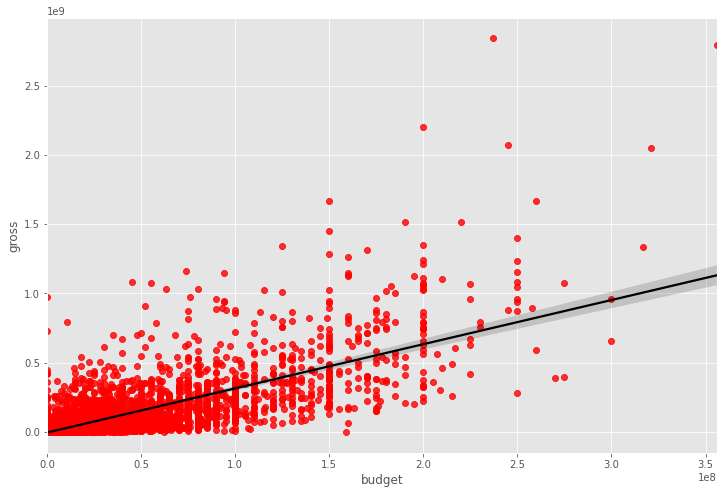

In [157]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'black'})

### Checking how strong the correlation is and whether or not there are other features correlated.

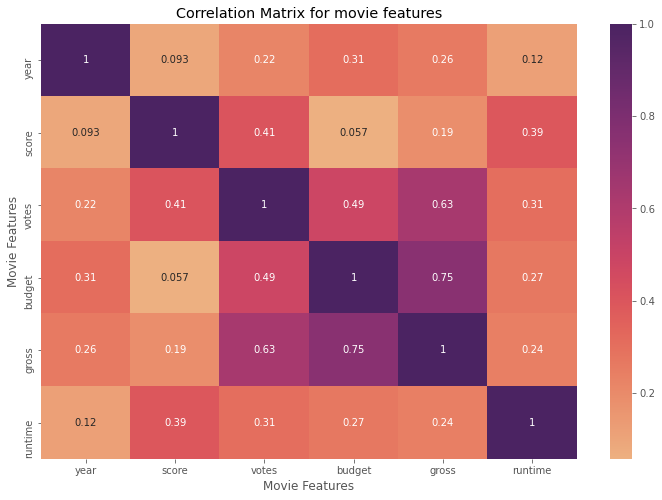

In [158]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='flare')
plt.title('Correlation Matrix for movie features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

### A simplified way of looking at correlation.

In [159]:
sorted_corr = df.corr().unstack().sort_values(ascending=False)
sorted_corr[sorted_corr != 1]

gross    budget     0.750157
budget   gross      0.750157
votes    gross      0.632870
gross    votes      0.632870
budget   votes      0.486931
votes    budget     0.486931
score    votes      0.407101
votes    score      0.407101
score    runtime    0.394564
runtime  score      0.394564
year     budget     0.309212
budget   year       0.309212
runtime  votes      0.306984
votes    runtime    0.306984
budget   runtime    0.268372
runtime  budget     0.268372
gross    year       0.261900
year     gross      0.261900
runtime  gross      0.244339
gross    runtime    0.244339
votes    year       0.222427
year     votes      0.222427
score    gross      0.186012
gross    score      0.186012
runtime  year       0.116358
year     runtime    0.116358
score    year       0.092616
year     score      0.092616
budget   score      0.056863
score    budget     0.056863
dtype: float64